# **Method**

* Three tree-based machine learning models were applied to Diabetes dataset: **Decision Tree Classifier** and **Random Forest Classifier**.
* Hyperparameter tuning method (**GridSearchCV**) was implemented to determine the optimal model parameters. Since GridSearchCV may not always yield the best parameters, the model parameters were also adjusted manually to explore changes in model accuracy.

# **Import Data & Data Overview**

In [ ]:
import pandas as pd

#Import data from drive
file_path = '/content/drive/My Drive/Diabetes.csv'
Diabetes = pd.read_csv(file_path)

In [ ]:
#View dataframe
Diabetes.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,MenHlth_bins,PhysHlth_bins,BMI_normalized
0,1,0,1,0,0,0,0,0,1,0,...,2,0,0,9,5,5,0,5,0,0.514286
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,13,6,8,0,0,0,0.200000
2,1,1,1,1,0,0,1,1,1,0,...,4,1,0,7,3,2,1,3,1,0.485714
3,0,0,1,0,0,0,0,0,0,0,...,1,0,1,4,6,8,0,0,0,0.457143
4,1,1,0,0,0,0,0,0,1,0,...,3,0,0,3,4,2,0,5,0,0.514286


In [ ]:
#Check null values and data types
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4949 entries, 0 to 4948
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                4949 non-null   int64  
 1   HighChol              4949 non-null   int64  
 2   CholCheck             4949 non-null   int64  
 3   Smoker                4949 non-null   int64  
 4   Stroke                4949 non-null   int64  
 5   HeartDiseaseorAttack  4949 non-null   int64  
 6   PhysActivity          4949 non-null   int64  
 7   Fruits                4949 non-null   int64  
 8   Veggies               4949 non-null   int64  
 9   HvyAlcoholConsump     4949 non-null   int64  
 10  AnyHealthcare         4949 non-null   int64  
 11  NoDocbcCost           4949 non-null   int64  
 12  GenHlth               4949 non-null   int64  
 13  DiffWalk              4949 non-null   int64  
 14  Sex                   4949 non-null   int64  
 15  Age                  

In [ ]:
# Check number of rows and columns of the dataset
Diabetes.shape

(4949, 22)

In [ ]:
#Check number of unique values for each column
#Except for Age, Education, Income, Mentlth_bins, and PhysHlth_bins, other categorical features are binary.
#BMI_normalized is numerical features.
Diabetes.nunique()

HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
DiffWalk                 2
Sex                      2
Age                     13
Education                5
Income                   8
Diabetes_binary          2
MenHlth_bins             6
PhysHlth_bins            6
BMI_normalized          36
dtype: int64

# **Import necessary packages**

In [ ]:
# packages for data
import numpy as np
import pandas as pd

# packages for machine learning
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# packages for plot and visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
%matplotlib inline

#package for ignore warning messages
import warnings
warnings.filterwarnings("ignore")

# **Data Preparation**

In [ ]:
columns = Diabetes.columns
columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary',
       'MenHlth_bins', 'PhysHlth_bins', 'BMI_normalized'],
      dtype='object')

In [ ]:
#Target outcome
target = ['Diabetes_binary']

In [ ]:
#Numerical Feature
num = ['BMI_normalized']

In [ ]:
#Categorical Features
cats = columns[~columns.isin(num) & ~columns.isin(target)]
cats, len(cats)

(Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'MenHlth_bins',
        'PhysHlth_bins'],
       dtype='object'),
 20)

In [ ]:
#Create new data frame named "Dia_X" by concatenaitng numerical featrues and categorical features
Dia_X = pd.concat([Diabetes[num], Diabetes[cats]], axis = 1)

#Check shape of features columns
Dia_X.shape

(4949, 21)

In [ ]:
#Target variable column
Dia_y = Diabetes[target]
Dia_y.shape

(4949, 1)

In [ ]:
# Create split with Sklearn, 70% of data for training, 30% for testing, random_state = 66
X_train, X_test, y_train, y_test  = train_test_split(Dia_X, Dia_y, test_size = 0.3,random_state = 66)

#Check the shape of train set and test set
X_train.shape, X_test.shape

((3464, 21), (1485, 21))

# **Decision Tree Classifier**

In [ ]:
#Create a DecisionTreeClassifier with default setting and random_state=66
DTC = tree.DecisionTreeClassifier(random_state=66)

#Fit the DecisionTreeClassifier with training data
DTC.fit(X_train,y_train)

#Accuracy of the model, round to 3 decimals
np.round(DTC.score(X_test, y_test),3)

0.797

In [ ]:
#Check depth of the tree
print(DTC.get_depth())

21


* With the default parameters and random_state=66, the model's accuracy was **0.797**.

## **DTC model optimization with GridSearchCV and Manual Adjustment**
* Parameter optimization
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html




In [ ]:
#Set up parameter dictionary for GridSearchCV
parameters_DTC = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy', 'log_loss'],
'max_features': ['log2', 'sqrt'],
'max_depth': [5,15,20,21,25,30],
'min_samples_split': [2,3,4,5],
'min_samples_leaf': [1,2,3,4,5],
}

In [ ]:
#Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Create GridSearchCV object with a decision tree classifier
DTC_grid_search = GridSearchCV(estimator = DTC,
param_grid = parameters_DTC,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [ ]:
#Fit GridSearchCV object with training data
DTC_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=66),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 15, 20, 21, 25, 30],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
#Evaluate the model's accuracy by using testing data
np.round(DTC_grid_search.score(X_test, y_test),3)

0.857

In [ ]:
#Print the hyperparameter combination found by grid search
print(DTC_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


Optimal parameters found by grid search:
* criterion: 'gini'
* max_depth = 5
* max_features = 'log2'
* min_samples_leaf = 1
* min_samples_split = 2
* splitter = 'random'

* With the parameter combination found by grid search, the model's accuracy increased from **0.797** to **0.857**.
* As a starting point, continue to explore different parameters....

In [ ]:
#Create a DecisionTreeClassifier object
new_DTC = tree.DecisionTreeClassifier(random_state=66, criterion ='gini', max_depth = 5, max_features ='log2', min_samples_leaf= 2, min_samples_split= 2, splitter= 'best')

#Fit the DecisionTreeClassifier with training data
new_DTC.fit(X_train,y_train)

#Accuracy of the model
np.round(new_DTC.score(X_test, y_test),3)

0.861

**Result**
* After hyperparameter tuning and manual adjustment, the decision tree classifier model accuracy increased from **0.797** to **0.861**.

**The Best Parameters**
* criterion: 'gini'
* max_depth = 5
* max_features = 'log2'
* min_samples_leaf = 2
* min_samples_split = 2
* splitter = 'best'

## **Visualization of the fitted Decision Tree Classifier**

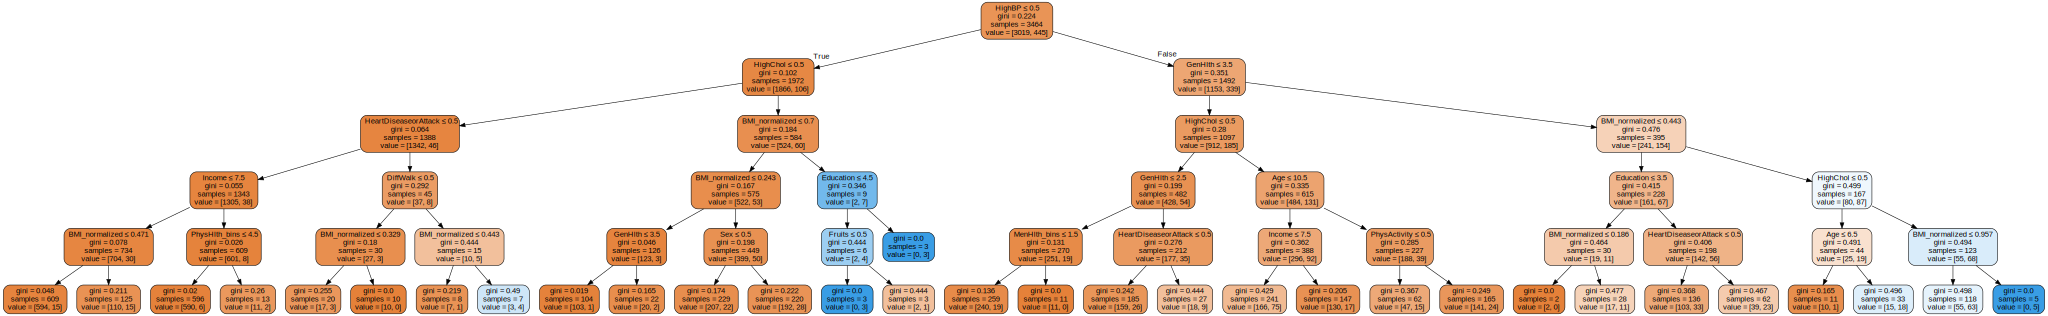

In [ ]:
#Create feature_names list
feature_names = Dia_X.columns.to_list()

#Visualizing fitted Decision Tree Clssifier
DTC_visual = tree.export_graphviz(new_DTC, out_file=None,
                                feature_names=feature_names,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)
graph_DTC = graphviz.Source(DTC_visual)
graph_DTC

## **Feature Importance from the Decision Tree Classifer Model**

In [ ]:
# Extract feature names of the updated model
DTC_features = new_DTC.feature_names_in_

# Extract feature importance
DTC_importance = np.round(new_DTC.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance_DTC = pd.DataFrame([DTC_features, DTC_importance]).T
df_importance_DTC.rename(columns={0: 'DTC_feature', 1:'DTC_importance'}, inplace=True)

#Sort importance in a descending order and drop index
df_importance_DTC.sort_values(['DTC_importance'], ascending = False, inplace=True)

#Show dataframe
df_importance_DTC.reset_index(drop=True)

,DTC_feature,DTC_importance
0,HighBP,0.36
1,GenHlth,0.22
2,BMI_normalized,0.19
3,HighChol,0.07
4,Income,0.05
5,HeartDiseaseorAttack,0.04
6,Age,0.03
7,Education,0.01
8,PhysActivity,0.01
9,Fruits,0.01


**Discussion**
* The feature importances determined by the decision tree classifier model showed that "**HighBP**" (High Blood Pressure) is the most significant indicator/predictor of Diabetes, followed by "**GenHlth**" (General Health), "**BMI_normalized**", and "**HighChol**" (High Cholesterol).
* According to the decision tree classifier model, other features appear to have weakly or non-significant roles in predicting diabetes.
* In terms of the pathophysiology of diabetes, high blood pressure, overall health, high BMI, and high cholesterol are well-known as the key indicators of diabetes. The model's findings are consistent with the medical knowledge.

# **Random Forest Classifier**

In [ ]:
#Initiate random forest classifier object
RFC = RandomForestClassifier(random_state=66)

#Fit model with training data
RFC.fit(X_train, y_train)

#Random Forest Classifier model's accuracy with default setting
np.round(RFC.score(X_test, y_test),3)

0.862

In [ ]:
#Check default parameters
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 66,
 'verbose': 0,
 'warm_start': False}

## **RFC model optimization with GridSearchCV and Manual Adjustment**

In [ ]:
#Set up parameter dictionary for GridSearchCV
RF_parameters = {'n_estimators': [100, 200],
                 'criterion' : ['gini', 'entropy', 'log_loss'],
                 'max_features': ['log2', 'sqrt', None],
                 'max_depth': [5,6,7,8,None],
                 'max_leaf_nodes':[2,3,4,5,None]
                  }

In [ ]:
#Create GridSearchCV object with a random forest classifier object
RF_grid_search = GridSearchCV(estimator = RFC,
param_grid = RF_parameters,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [ ]:
#Fit the GridSearchCV object with training data
RF_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=66),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, None],
                         'max_features': ['log2', 'sqrt', None],
                         'max_leaf_nodes': [2, 3, 4, 5, None],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#Obtain the parameters used from the GridSearchCV object
RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'n_estimators': 100}

In [ ]:
#Evalute the accuracy of the model from GridSearchCV
np.round(RF_grid_search.score(X_test, y_test),3)

0.862

* The model's accuracy stayed the same at 0.862.
* Need to explore different parameters manually...

In [ ]:
#Create a random forest classifier object with various parameter setting
new_RFC = RandomForestClassifier(random_state=66, n_estimators = 20, criterion = 'gini', max_depth = 30, max_features = 'sqrt')

#Fit the model with training data
new_RFC.fit(X_train, y_train)

#Evalute the accuracy of the model
np.round(new_RFC.score(X_test, y_test),3)

0.867

**Result**
* After multiple trials, the highest model's accuracy was **0.867**.

**Best parameters of Random Forest Classifier**
* criterion = 'gini'
* max_depth = 30
* max_features = 'sqrt'
* n_estimators = 20

## **Visualization of Fitted Random Forest Classifier**

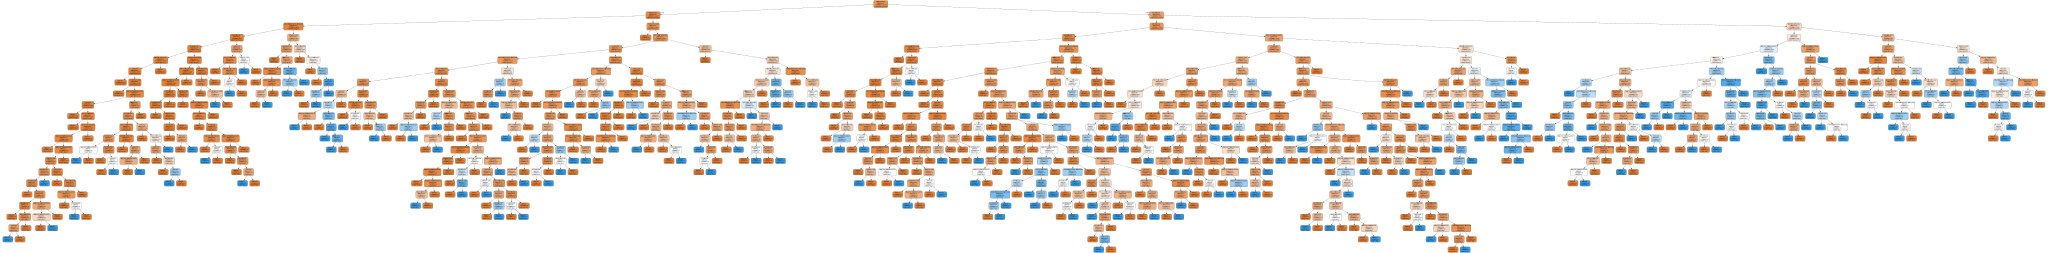

In [ ]:
#Create feature_names list
feature_names = Dia_X.columns.to_list()

#Obtain the first decision tree from the random forest classifier
individual_tree = new_RFC.estimators_[0]

#Visualizing the first decision tree
RFC_visual = tree.export_graphviz(individual_tree, out_file=None,
                                feature_names=feature_names,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)
graph_RFC = graphviz.Source(RFC_visual)
graph_RFC

## **Feature Importance From The Random Forest Classifier Model**

In [ ]:
# Extract feature names of the updated model
RFC_features = new_RFC.feature_names_in_

# Extract feature importance
RFC_importance = np.round(new_RFC.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance_RFC = pd.DataFrame([RFC_features, RFC_importance]).T
df_importance_RFC.rename(columns={0: 'RFC_feature', 1:'RFC_importance'}, inplace=True)

#Sort importance in a descending order and drop index
df_importance_RFC.sort_values(['RFC_importance'], ascending = False, inplace=True)

#Show dataframe
df_importance_RFC.reset_index(drop=True)

,RFC_feature,RFC_importance
0,BMI_normalized,0.18
1,Age,0.13
2,Income,0.1
3,GenHlth,0.08
4,Education,0.07
5,HighBP,0.05
6,Sex,0.04
7,DiffWalk,0.04
8,PhysHlth_bins,0.04
9,Smoker,0.04


**Discussion**
* The Random Forest Classifier identified "BMI_normalized as the most important feature in predicting diabetes, followed by 'Age', 'Income', 'GenHlth', and 'Education'.
* Most of the other features are also considered by the model with score greater than 0. Except for "CholCheck".
* There is a strong relationship between diabtes and BMI. In diabetes patients, most of the excess blood sugar are stored as fat. Thus, diabetes patients are more likely to be overweight and obsese.
* There is a higher prevalence of diabetes among the elderly. However, age acts as a confounding variable due to the fact that older individuals may also have other health problems that can affect the condition.
* It was noticed that "Income" and "Education" are socioeconomic factors. Even though there is association between the socioeconomic factors and diabetes, those factors often have indirect effects on other features, such as the access to healthcare and nutritious food, management of diseases, mental health condition, etc. While such socioeconomic factors may not directly cause diabetes, those factors significantly affect the lifestyle habits of individuals, which ultimately lead to development of diabetes.

# **Conclusion: Comparison Between Two Models**

**Model's Accuracy**:

* Decision Tree Classifier: 0.861
* **Random Forest Classifier: 0.867**

**Random Forest Classifier**

**Pros**:
* Slightly higher accuracy (0.867) than decision tree classifier (0.861), which makes the random forest classifier a more reliable and effecitive machine learning model for this dataset.
* Able to capture complex correlations between features by incorporating socioeconomic factors as the most significant predictors, which may be the root cause of the development of diabetes.
* Reduces overfitting becacuse two layers of randomness (data and feature selection) were introduced in the training model.

**Cons**:
* Highly complex as the model utilizes all available features
* Longer training time due to complexity
* Less straightforward visualization of decision paths, making the model difficult to interpret.


**Decision Tree Classifer**

**Pros**:
* Inclueds only a few most important features, making the model simple and easy to interpret.
* Faster training time, which is a benefit when dealing with large dataset.
* Clear visualization of the tree and decision path.


**Cons**:
* Susceptible to overfitting.
* Does not consider other valuable features where feature importance scores ~0.
* Sensitive to noise and variation of data.